## ДЗ 1 

In [1]:
from IPython import display
import numpy as np
import random
import torch
import torchvision
import torchvision.transforms as transforms
import torch.utils
from torch import nn 
from torch import optim
import math 
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

1.	Нахождение сложной производной.
Найдите производную по x от функции:
 
При этом надо пользоваться встроенным в PyTorch autograd.

В итоге я хочу видеть функцию вида:

def find_x_derivative(x, y):
    YOUR CODE HERE
  
   return # YOUR CODE HERE


In [8]:
x = torch.autograd.Variable(torch.Tensor([2]),requires_grad=True)
y = 5*x**4 + 3*x**3 + 7*x**2 + 9*x - 5

y.backward()
x.grad

tensor([233.])

In [56]:
x = 1
y = 1

z = math.sin(math.tan(x)*x**2*y**(-1)+np.log(np.exp(-x*x-3)+x**3*y))*math.tan(x**2*np.exp(x**9))
f = torch.autograd.Variable(torch.Tensor([z]),requires_grad=True)
z 
f

tensor([-0.4505], requires_grad=True)

In [21]:
def find_x_derivative(x, y):
   x = torch.autograd.Variable(torch.Tensor([x]),requires_grad=True)
   #x = x.detach().numpy()
   y = torch.autograd.Variable(torch.Tensor([y]),requires_grad=True)
   #y = y.detach().numpy()
   #z = math.sin(math.tan(x)*x**2*+np.log(np.exp(-x*x-3)+x**3))*math.tan(x**2*np.exp(x**9))
   z = math.sin(math.tan(x)*x**2*y**(-1)+math.log(math.exp(-x*x-3)+x**3*y))*math.tan(x**2*math.exp(x**9))
   z.backward()
   return x.grad

In [22]:
find_x_derivative(1, 1)

AttributeError: 'float' object has no attribute 'backward'

3.	Обучение своей нейронной сети

Взять датасет Fashion-Mnist, построить свою нейронную сеть cо сверточными слоями и обучить эту нейронную сеть пользуясь материалами из вебинара. 
Архитектура нейронной сети должна быть следующая:
1)	Сначала должны идти два блока в которых должны присутствовать следующие слои:
a)	два подряд идущие сверточных слоя(после каждого сверточного слоя идет активация Relu)
b)	И в конце каждого блока слой макс пулинга
2)	в конце должны идти 3 линейных слоя.
При этом можете поиграться с разными оптимизаторами.
В качестве результата прошу приложить скрин с картинками и предсказанными классами.


In [58]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
#0.1307 - среднее, 0.3081 - стандартное отклонение датасета

In [59]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=120,
                                          shuffle=True, num_workers=12)

In [60]:
trainset.data.size()

torch.Size([60000, 28, 28])

In [61]:
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=120,
                                         shuffle=True, num_workers=12)

In [62]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [63]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


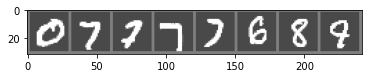

tensor([0, 7, 7, 7, 7, 6, 8, 9])


In [64]:
imshow(torchvision.utils.make_grid(images[:8,:]))
print(labels[:8])

In [65]:
'''
Архитектура нейронной сети должна быть следующая:
1)	Сначала должны идти два блока в которых должны присутствовать следующие слои:
a)	два подряд идущие сверточных слоя(после каждого сверточного слоя идет активация Relu)
b)	И в конце каждого блока слой макс пулинга
2)	в конце должны идти 3 линейных слоя.
'''
   
class ConvNet(nn.Module): 
     def __init__(self): 
         super(ConvNet, self).__init__() 
         self.layer1 = nn.Sequential( nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
         self.layer2 = nn.Sequential( nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
         
         self.fc1 = nn.Linear(7 * 7 * 64, 2000) 
         self.fc2 = nn.Linear(2000, 100)
         self.fc3 = nn.Linear(100, 10)    
            
            
     def forward(self, x): 
         x = self.layer1(x) 
         x = self.layer2(x) 
         x = x.reshape(x.size(0), -1) 
         #x = self.drop_out(x) 
         x = self.fc1(x) 
         x = self.fc2(x) 
         x = self.fc3(x) 
         return x
            
 
net = ConvNet().to('cpu')

In [66]:

model = ConvNet()

device = 'cpu'
#if device == "cuda:0":
#    model.to(device)

In [67]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [68]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        if device == "cpu":
            inputs, labels = data
        elif device == "cuda:0":
            inputs, labels = data[0].to(device), data[1].to(device)
        else:
            print("DEVICE ERROR")
            break

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 499))
            running_loss = 0.0
print('Finished Training')

[1,   500] loss: 0.245
[2,   500] loss: 0.067
Finished Training


In [69]:
for i, data in enumerate(testloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        if device == "cpu":
            inputs, labels = data
        elif device == "cuda:0":
            inputs, labels = data[0].to(device), data[1].to(device)
        break

In [70]:
y_pred = model(inputs).cpu().detach().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


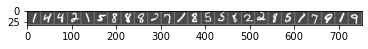

y:      [1 4 4 2 1 5 8 8 8 2 7 1 8 5 5 8 2 2 8 5 1 7 9 1 9]
y_pred: [1 4 4 2 1 5 8 8 8 2 7 1 8 5 5 8 2 2 8 5 1 7 9 1 9]


In [71]:
imshow(torchvision.utils.make_grid(inputs.cpu()[:25,:], 25))
print("y:     ",labels.cpu().numpy()[:25])
print("y_pred:", y_pred.argmax(1)[:25])